# SERIE DE TIEMPO PARA PREDECIR CUÁNDO SE PODRÁ LOGRAR LA INMUNIDAD DE REBAÑO COVID-19 EN COLOMBIA

# Introducción

Los coronavirus (CoV) son virus que surgen periódicamente en diferentes áreas del mundo y que causan Infección Respiratoria Aguda (IRA), es decir gripa, que pueden llegar a ser leve, moderada o grave.

El nuevo Coronavirus (COVID-19) ha sido catalogado por la Organización Mundial de la Salud como una emergencia en salud pública de importancia internacional (ESPII). Se han identificado casos en todos los continentes y, el 6 de marzo se confirmó el primer caso en Colombia.

La infección se produce cuando una persona enferma tose o estornuda y expulsa partículas del virus que entran en contacto con otras personas.

[https://covid19.minsalud.gov.co/](https://https://covid19.minsalud.gov.co/)

Algunas posibles proyecciones con respecto a la inmunidad de rebaño en Colombia son:

# Inmunidad de rebaño puede alcanzar hasta el 60%

Luego de más de 170 días del reporte del primer caso de covid-19 en el país, Colombia  cuenta con una primera meseta con tendencia a la disminución en el primer brote permitiendo una libertad responsable, así lo indicó el ministro de Salud y Protección Social, Fernando Ruiz Gómez.

"Según la cifras y  los estudios, la inmunidad de rebaño  lograría una afectación  alrededor del 60% en la medida que vayamos avanzando en el acatamiento de los protocolos de bioseguridad y poder regresar a la normalidad", dijo el ministro.

25/08/2020

Boletín de Prensa No 637 de 2020

[https://www.minsalud.gov.co/Paginas/Inmunidad-de-rebano-puede-alcanzar-hasta-el-60.aspx](https://https://www.minsalud.gov.co/Paginas/Inmunidad-de-rebano-puede-alcanzar-hasta-el-60.aspx)

# Colombia, a menos de 200 días para llegar a la inmunidad de rebaño

Una de las grandes preguntas hoy en día es cuándo se empezará a alcanzar la inmunidad de rebaño, es decir, vacunar completamente a más del 75% de la población.

Según un reporte publicado esta semana por el Banco de Bogotá, con información de Our World in Data, Colombia estaba este miércoles a 199 días de alcanzar ese objetivo de la inmunidad de rebaño.

Septiembre 16 De 2021 - 09:30 P. M.

[https://www.portafolio.co/economia/colombia-a-menos-de-200-dias-para-llegar-a-la-inmunidad-de-rebano-556335](https://www.portafolio.co/economia/colombia-a-menos-de-200-dias-para-llegar-a-la-inmunidad-de-rebano-556335)

# Cuántos somos?

De acuerdo con el último Censo Nacional de Población y Vivienda, CNPV, realizado por el Departamento Administrativo Nacional de Estadística, DANE, la cantidad de personas en Colombia está alrededor de los 50 millones de personas.

Por lo tanto, la inmunidad de rebaño se alcanzará con la vacunación de 38 millones de personas, aproximadamente.




# Datos

Dosis Aplicadas contra COVID-19 - Salud Y Protección Social

Actualizado 13 de octubre de 2021

Datos proporcionados por Ministerio de Salud y Protección Social

Idioma Español

Cobertura Geográfica Nacional

[https://www.datos.gov.co/Salud-y-Protecci-n-Social/Dosis-Aplicadas-contra-COVID-19/prrv-jnta](https://https://www.datos.gov.co/Salud-y-Protecci-n-Social/Dosis-Aplicadas-contra-COVID-19/prrv-jnta)

# Qué hay en el Dataset?

537.251 filas X 11 columnas

# Columnas en este Dataset

1. **Fecha aplicación:** Fecha y hora. Tipo de dato: Marca de Tiempo Variable. Nombre del Campo API: fecha_aplicaci_n

2. **Entidad Territorial:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: entidad_territorial

3. **Código Entidad Territorial:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: c_digo_entidad_territorial

4. **Departamento Divipola:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: departamento_divipola

5. **Departamento:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: departamento

6. **Municipio:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: municipio

7. **Municipio Divipola:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: municipio_divipola

8. **Laboratorio:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: laboratorio

9. **Etapa:** Texto simple. Tipo de dato: Texto. Nombre del Campo API: etapa

10. **Número de 1 dosis aplicadas:** Número. Tipo de dato: Número. Nombre del Campo API: n_mero_de_1_dosis_aplicadas

11. **Número de esquema completo aplicados:** Número. Tipo de dato: Número. Nombre del Campo API: n_mero_de_esquema_completo


# Serie de Tiempo

Es correlacional porque depende de los datos del día anterior.



# Importando librerias

In [14]:
import datetime                                  # fecha y hora
import numpy as np                               # vectores y matrices
import pandas as pd                              # tablas y data manipulations
import matplotlib.pyplot as plt                  # plots
from matplotlib.pylab import rcParams
import seaborn as sns                            # mas plots
sns.set()

from dateutil.relativedelta import relativedelta # trabajar con fechas
from scipy.optimize import minimize              # 

import statsmodels.formula.api as smf            # statistics y econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # algunas funciones utiles
from tqdm import tqdm_notebook

import warnings                                  # quitar warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

rcParams['figure.figsize'] = 10, 6

# Cargando los datos

Los datos reales del progreso de la vacunación serán analizados para predecir en cuánto tiempo se podrá lograr la inmunización del 75% de la población colombiana.

Descargados desde [www.datos.gov.co](https://www.datos.gov.co) y almacenados en la unidad Drive personal.


In [15]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Python/Proyecto_final_SENA_Conv_Mujeres_2021


In [16]:
%cd '/content/gdrive/MyDrive/Python/Proyecto_final_SENA_Conv_Mujeres_2021/'

/content/gdrive/MyDrive/Python/Proyecto_final_SENA_Conv_Mujeres_2021


# Explorando los datos

Antes de comenzar nuestro análisis exploratorio, echemos un vistazo a los datos a nuestra disposición:

In [17]:
#Cargar la informacion
df = pd.read_csv('Dosis_Aplicadas_contra_COVID-19.csv')

In [18]:
# Dimensiones
df.shape

(537251, 11)

In [19]:
# Columnas
df.columns

Index(['Fecha aplicación', 'Entidad Territorial', 'Código Entidad Territorial',
       'Departamento Divipola', 'Departamento', 'Municipio',
       'Municipio Divipola', 'Laboratorio', 'Etapa',
       'Número de 1 dosis aplicadas', 'Número de esquema completo aplicados'],
      dtype='object')

In [20]:
# Tipo de datos
df.dtypes

Fecha aplicación                        object
Entidad Territorial                     object
Código Entidad Territorial              object
Departamento Divipola                   object
Departamento                            object
Municipio                               object
Municipio Divipola                      object
Laboratorio                             object
Etapa                                   object
Número de 1 dosis aplicadas              int64
Número de esquema completo aplicados     int64
dtype: object

In [21]:
# Primeras diez filas
df.head(10)

,Fecha aplicación,Entidad Territorial,Código Entidad Territorial,Departamento Divipola,Departamento,Municipio,Municipio Divipola,Laboratorio,Etapa,Número de 1 dosis aplicadas,Número de esquema completo aplicados
0,03/26/2021 12:00:00 AM,Córdoba,23,23,Córdoba,Cereté,23162,SINOVAC,1,2,0
1,04/16/2021 12:00:00 AM,Córdoba,23,23,Córdoba,La Apartada,23350,PFIZER,2,5,0
2,04/08/2021 12:00:00 AM,La Guajira,44,44,La Guajira,Fonseca,44279,SINOVAC,1,0,1
3,04/19/2021 12:00:00 AM,Bolívar,13,13,Bolívar,Turbaco,13836,PFIZER,2,17,0
4,04/27/2021 12:00:00 AM,No definido,No definido,No definido,No definido,No definido,No definido,PFIZER,3,1,0
5,04/29/2021 12:00:00 AM,Cesar,20,20,Cesar,Chiriguaná,20178,SINOVAC,1,0,2
6,03/16/2021 12:00:00 AM,Córdoba,23,23,Córdoba,Puerto Escondido,23574,SINOVAC,1,1,0
7,04/01/2021 12:00:00 AM,Córdoba,23,23,Córdoba,Tierralta,23807,PFIZER,1,0,1
8,05/13/2021 12:00:00 AM,Cundinamarca,25,25,Cundinamarca,Soacha,25754,PFIZER,2,0,1
9,05/23/2021 12:00:00 AM,Córdoba,23,23,Córdoba,San Pelayo,23686,PFIZER,2,1,0


In [22]:
# Resumen Estadístico
df.describe()

,Número de 1 dosis aplicadas,Número de esquema completo aplicados
count,537251.000000,537251.000000
mean,4.636565,3.651420
std,43.232072,32.686043
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,5165.000000,4447.000000


In [23]:
# Se define el índice del dataset como **Fecha aplicacion** con la función index_col
# Se transforma su formato de fecha y hora a formato **fecha** con la función parse_dates para que Python la entienda como formato fecha
df_time = pd.read_csv('Dosis_Aplicadas_contra_COVID-19.csv', index_col=['Fecha aplicación'], 
                  parse_dates=['Fecha aplicación'])
df_time.head(10)

,Entidad Territorial,Código Entidad Territorial,Departamento Divipola,Departamento,Municipio,Municipio Divipola,Laboratorio,Etapa,Número de 1 dosis aplicadas,Número de esquema completo aplicados
Fecha aplicación,,,,,,,,,,
2021-03-26,Córdoba,23,23,Córdoba,Cereté,23162,SINOVAC,1,2,0
2021-04-16,Córdoba,23,23,Córdoba,La Apartada,23350,PFIZER,2,5,0
2021-04-08,La Guajira,44,44,La Guajira,Fonseca,44279,SINOVAC,1,0,1
2021-04-19,Bolívar,13,13,Bolívar,Turbaco,13836,PFIZER,2,17,0
2021-04-27,No definido,No definido,No definido,No definido,No definido,No definido,PFIZER,3,1,0
2021-04-29,Cesar,20,20,Cesar,Chiriguaná,20178,SINOVAC,1,0,2
2021-03-16,Córdoba,23,23,Córdoba,Puerto Escondido,23574,SINOVAC,1,1,0
2021-04-01,Córdoba,23,23,Córdoba,Tierralta,23807,PFIZER,1,0,1
2021-05-13,Cundinamarca,25,25,Cundinamarca,Soacha,25754,PFIZER,2,0,1


In [24]:
# Se eliminan las columnas que no se necesitan para el análisis y se tendrá en cuenta la vacunación con esquema completo aplicado
df_new = df_time.drop(columns=['Entidad Territorial', 'Código Entidad Territorial', 'Departamento Divipola', 'Municipio', 'Municipio Divipola', 'Laboratorio', 'Etapa', 'Número de 1 dosis aplicadas'])
df_new

,Departamento,Número de esquema completo aplicados
Fecha aplicación,,
2021-03-26,Córdoba,0
2021-04-16,Córdoba,0
2021-04-08,La Guajira,1
2021-04-19,Bolívar,0
2021-04-27,No definido,0
...,...,...
2021-08-18,La Guajira,15
2021-08-25,Bolívar,0
2021-08-18,"Bogotá, D. C.",1


In [25]:
# Conteo de departamentos con mayor dosis aplicadas
df_new['Departamento'].value_counts()

Antioquia                   52168
Cundinamarca                45048
Valle Del Cauca             36404
Santander                   31694
Boyacá                      26729
Bolívar                     25397
Nariño                      24856
Atlántico                   23767
Tolima                      22064
Córdoba                     21436
Cauca                       20553
Bogotá, D. C.               18952
Magdalena                   18312
Cesar                       17605
Norte De Santander          17488
Huila                       15572
Caldas                      13737
Meta                        13641
Sucre                       11767
Risaralda                   11456
No definido                 10217
Quindío                     10201
La Guajira                   9089
Caquetá                      8728
Casanare                     7822
Putumayo                     6707
Chocó                        5285
Arauca                       4294
Guaviare                     1925
San Andrés y P

# Análisis de los datos

Se procede a realizar el análisis con el datasets con la mayor cantidad de dosis aplicadas en el territorio nacional. Es decir, Antioquia.

Igualmente, se procede a comprobar la cantidad de dosis aplicadas en el dataset.

Además, se realiza la suma acumulativa del esquema completo aplicado, para la columna:

**Número de esquema completo aplicados**



In [26]:
# Antioquia
df_ant = df_new.loc[df_new.loc[:, 'Departamento'] == 'Antioquia']
df_ant['Número de esquema completo aplicados'] = df_ant['Número de esquema completo aplicados'].cumsum()
df_ant2 = df_ant.groupby(by=['Fecha aplicación']).sum().groupby(level=[0]).cumsum().sort_values('Fecha aplicación')
df_ant2

,Número de esquema completo aplicados
Fecha aplicación,
2021-02-17,352195
2021-02-19,169965
2021-02-21,176270
2021-02-24,200913
2021-02-25,365458
...,...
2021-10-07,8450144
2021-10-08,5696824
2021-10-09,5213809


In [27]:
# Dimensiones del dataset de Antioquia
df_ant2.shape

(233, 1)

In [28]:
# Tamaño del dataset de Antioquia
df_ant2.size

233

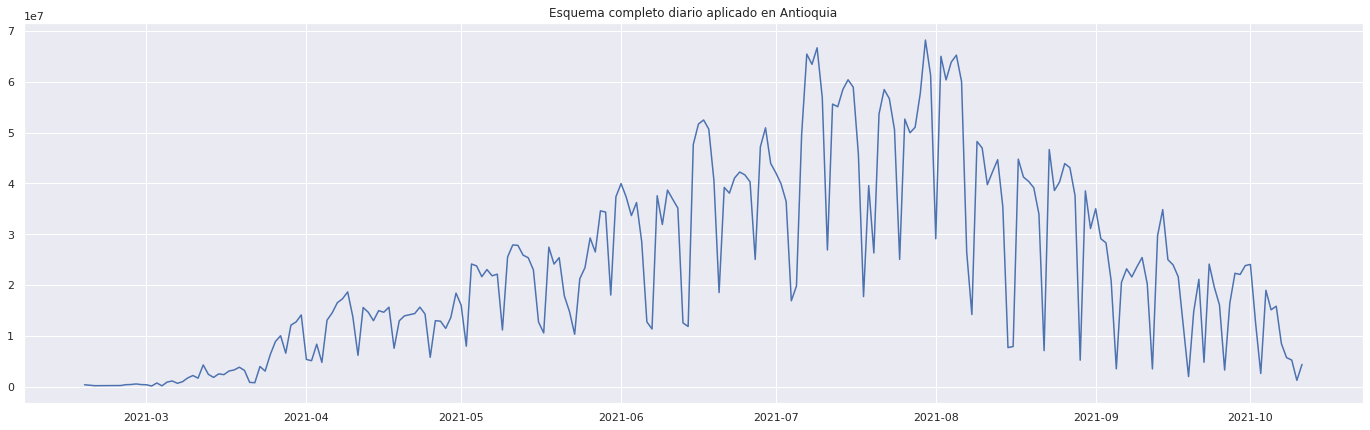

In [378]:
# Graficando las series de tiempo: Antioquia
plt.figure(figsize=(24,7))
plt.plot(df_ant2)
plt.title('Esquema completo diario aplicado en Antioquia')
plt.grid(True)
plt.show()

# Move, smoothe, evaluate

Empecemos por una hipótesis ingenua: "mañana será igual que hoy". Sin embargo, en lugar de un modelo como  y^t=yt−1  (que en realidad es una excelente línea de base para cualquier problema de predicción de series de tiempo y, a veces, es imposible de superar), asumiremos que el valor futuro de nuestra variable depende del promedio de sus  k  valores anteriores. Por lo tanto, usaremos el moving average

In [384]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(df_ant2, 30) #predicción para el último dia observado (últimos 30 dias)

15149307.686666667

Desafortunadamente, no podemos hacer predicciones lejanas en el futuro; para obtener el valor para el siguiente paso, necesitamos que los valores anteriores se observen realmente. Pero la media móvil tiene otro caso de uso: suavizar la serie temporal original para identificar tendencias. Pandas tiene una implementación disponible con DataFrame.rolling (window).mean(). Cuanto más ancha sea la ventana, más suave será la tendencia. En el caso de datos muy ruidosos, que se encuentran a menudo en finanzas, este procedimiento puede ayudar a detectar patrones comunes.

In [385]:
def mean_absolute_error(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

In [386]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Graficar los intervalores de confianza para valores smoothedes
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Con los intervaloes encontrar valores anormales 
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

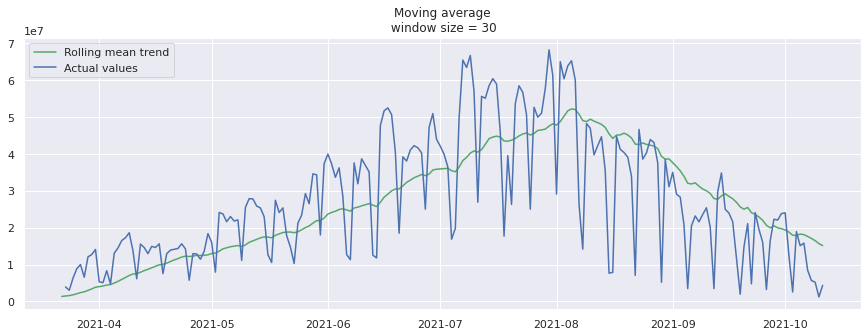

In [387]:
plotMovingAverage(df_ant2, 30)

Cuando aplicamos el suavizado diario a los datos por dia, pudimos ver claramente la dinámica del proceso de vacunación. Durante los fines de semana, los valores son más altos (más tiempo disponible los fines de semana para ir al puesto de vacunación) mientras que se asiste menos los días de semana, debido a ser dias laborales.

In [34]:
def mean_absolute_error(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

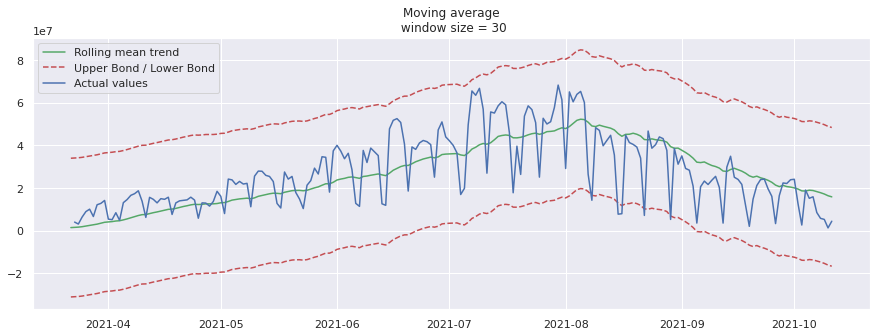

In [35]:
plotMovingAverage(df_ant2, 30, plot_intervals=True)

Ahora, creemos un sistema de detección de anomalías simple con la ayuda de la media móvil. Desafortunadamente, en este conjunto de datos en particular, todo es más o menos normal, por lo que intencionalmente haremos que uno de los valores sea anormal en nuestro marco de datos

df_ant2._anomaly

In [36]:
df_ant2._anomaly = df_ant2.copy()
# digamos que eliminamos 80% de la candidad de esquema de vacunación completa
df_ant2.iloc[-20] = df_ant2._anomaly.iloc[-20] * 0.2

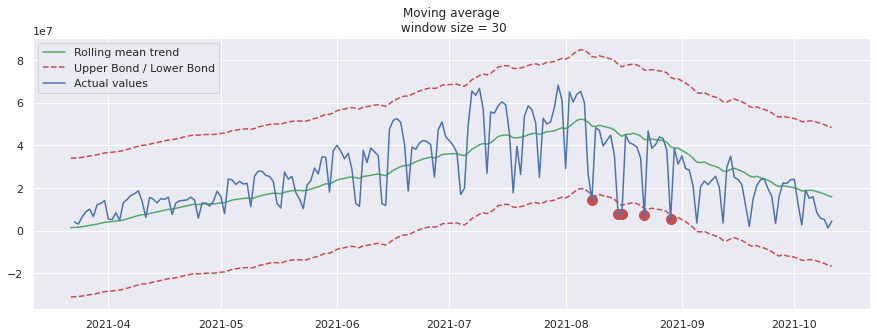

In [37]:
plotMovingAverage(df_ant2._anomaly, 30, plot_intervals=True, plot_anomalies=True)

# Series de tiempo estacionarias y no estacionarias

La estacionariedad es una es una propiedad de una serie de tiempo. Una serie estacionaria es aquella en la que los valores de la serie no son una función del tiempo.

Es decir, las propiedades estadísticas de la serie como media, varianza y autocorrelación son constantes en el tiempo. La autocorrelación de la serie no es más que la correlación de la serie con sus valores anteriores, más adelante.

Una identificación de serie de tiempo estacionaria desprovista de efectos estacionales también.

Antes de comenzar a modelar, debemos mencionar una propiedad tan importante de las series de tiempo: estacionariedad.

Si un proceso es estacionario, eso significa que no cambia sus propiedades estadísticas con el tiempo, es decir, su media y varianza. (La constancia de la varianza se llama homocedasticidad) La función de covarianza no depende del tiempo; solo debería depender de la distancia entre observaciones.

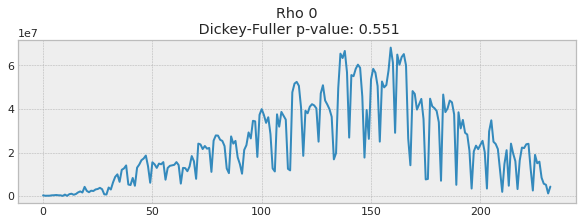

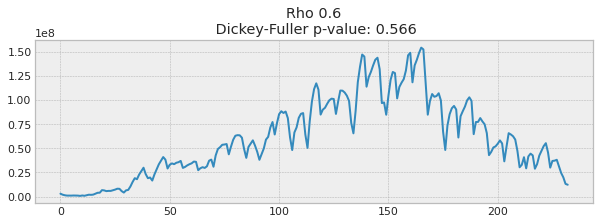

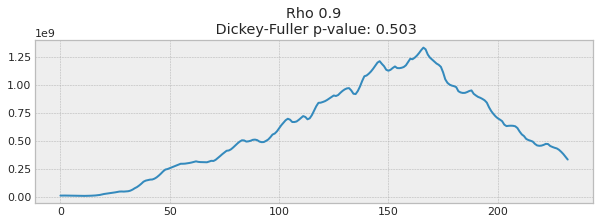

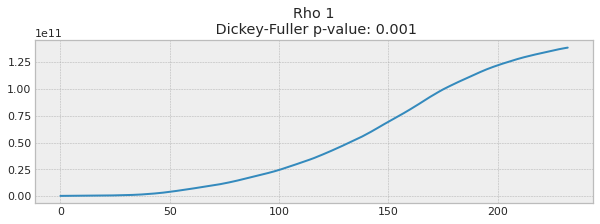

In [38]:
def plotProcess(x,rho=0):
    w = x 
    for t in range(len(x)):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3))) 
x = df_ant2.copy()

for rho in [0, 0.6, 0.9, 1]:
   plotProcess(x['Número de esquema completo aplicados'].values, rho=rho)

## Augmented Dickey-Fuller test

Hipótesis nula (H0): si no se rechaza, sugiere que la serie de tiempo tiene una raíz unitaria, lo que significa que no es estacionaria. **Tiene alguna estructura dependiente del tiempo.**

Hipótesis alternativa (H1): Se rechaza la hipótesis nula; sugiere que la serie de tiempo no tiene una raíz unitaria, lo que significa que es estacionaria. **No tiene una estructura dependiente del tiempo.**

In [39]:
X = x['Número de esquema completo aplicados'].values
result = sm.tsa.stattools.adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.263072
p-value: 0.000514


Como el p-value es pequeño, se rechaza la hipótesis nula.

Por lo tanto, la serie de tiempo es estacionaria y su estructura no es dependiente en el tiempo.

De hecho, el aumento de personas vacunadas con esquema completo depende de la disponibilidad de las dosis y de la asistencia a las entidades promotoras de salud para recibir el biológico.

Entonces, la serie de tiempo es producto del azar.

In [40]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

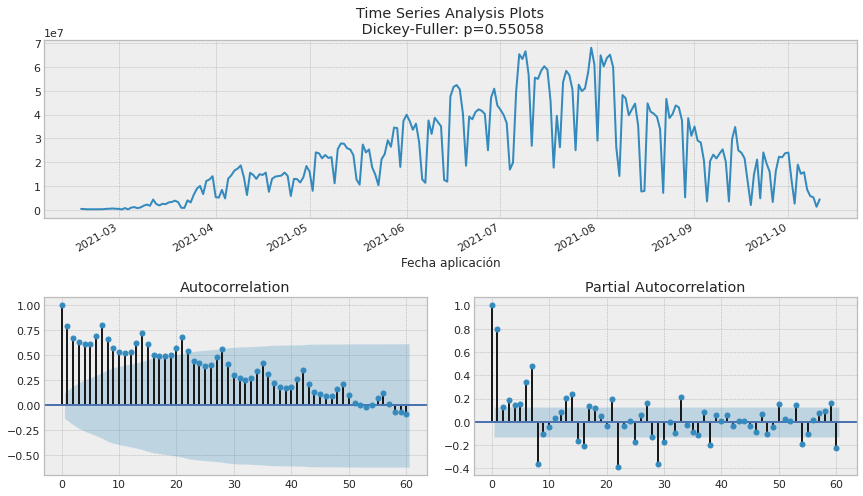

In [41]:
tsplot(df_ant2['Número de esquema completo aplicados'], lags=60)

Este valor atípico en la gráfica de autocorrelación parcial parece un error de statsmodels, la autocorrelación parcial será <= 1 como cualquier correlación.

Sorprendentemente, las series iniciales son estacionarias; la prueba de Dickey-Fuller rechazó la hipótesis nula de que existe una raíz unitaria. En realidad, podemos ver esto en el gráfico mismo: no tenemos una tendencia visible, por lo que la media es constante y la varianza es bastante estable. Lo único que queda es la estacionalidad, con la que tenemos que lidiar antes de modelar. Para hacerlo, tomemos la "diferencia estacional", que significa una simple resta de la serie de sí misma con un retraso que es igual al período estacional.

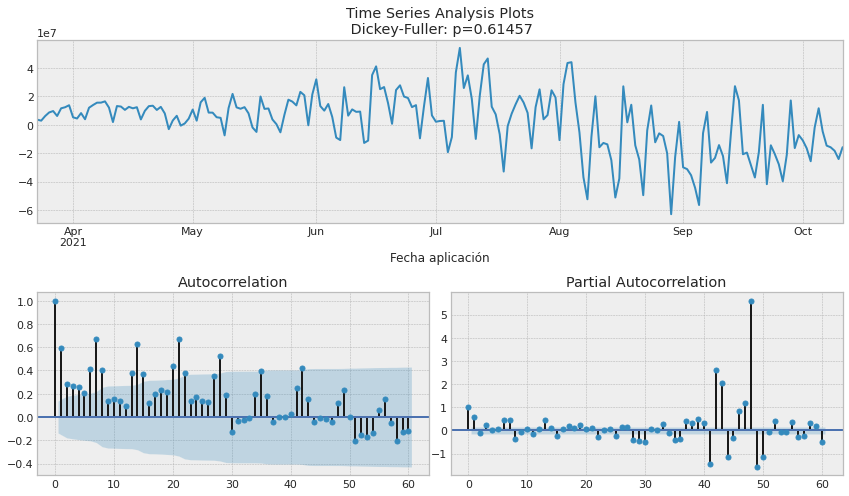

In [42]:
df_ant2['Número de esquema completo aplicados'].diff = df_ant2['Número de esquema completo aplicados'] - df_ant2['Número de esquema completo aplicados'].shift(30)
tsplot(df_ant2['Número de esquema completo aplicados'].diff[30:], lags=60)

Ahora es mucho mejor con la estacionalidad visible desaparecida. Sin embargo, la función de autocorrelación todavía tiene demasiados retrasos significativos. Para eliminarlos, tomaremos las primeras diferencias, restando la serie de sí misma con retraso 1.

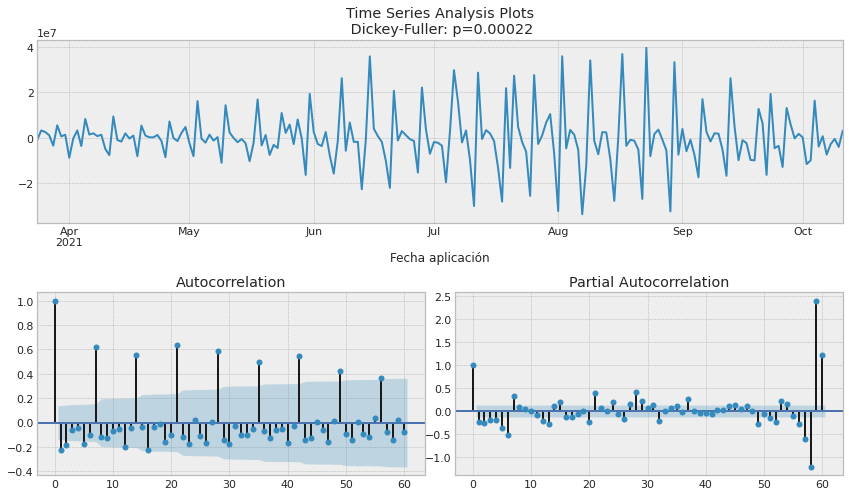

In [43]:
df_ant2['Número de esquema completo aplicados'].diff = df_ant2['Número de esquema completo aplicados'] - df_ant2['Número de esquema completo aplicados'].shift(1)
tsplot(df_ant2['Número de esquema completo aplicados'].diff[30+1:], lags=60)

¡Perfecto! Nuestra serie ahora parece algo indescriptible, oscilando alrededor de cero. La prueba de Dickey-Fuller indica que está estacionaria y que ha disminuido el número de picos significativos en ACF. ¡Por fin podemos empezar a modelar!

## ARIMA-family Crash-Course

Explicaremos este modelo construyéndolo letra por letra. $SARIMA(p, d, q) (P, D, Q, s) $, modelo de media móvil de autorregresión estacional:

- $ AR (p) $ - modelo de autorregresión, es decir, regresión de la serie de tiempo sobre sí misma. El supuesto básico es que los valores de la serie actual dependen de sus valores anteriores con algún rezago (o varios rezagos). El retraso máximo en el modelo se denomina $ p $. Para determinar el $ p $ inicial, debe observar el gráfico PACF y encontrar el mayor retraso significativo después del cual **la mayoría** de los demás retrasos se vuelven insignificantes.
- $ MA (q) $ - modelo de promedio móvil. Sin entrar en demasiados detalles, modela el error de la serie de tiempo, nuevamente con el supuesto de que el error actual depende del anterior con cierto rezago, lo que se denomina $ q $. El valor inicial se puede encontrar en el gráfico ACF con la misma lógica que antes.

Combinemos nuestras primeras 4 letras:

$ AR (p) + MA (q) = ARMA (p, q) $

¡Lo que tenemos aquí es el modelo de media móvil autorregresiva! Si la serie es estacionaria, se puede aproximar con estas 4 letras. Continuemos.

- $ I(d)$ - orden de integración. Este es simplemente el número de diferencias no estacionales necesarias para que la serie sea estacionaria. En nuestro caso, es solo 1 porque usamos primeras diferencias.

Al agregar esta letra a las cuatro, obtenemos el modelo $ ARIMA $ que puede manejar datos no estacionarios con la ayuda de diferencias no estacionales. Genial, ¡una carta más para llevar!

- $S(s)$ - esto es responsable de la estacionalidad e iguala la duración del período de temporada de la serie

Con esto, tenemos tres parámetros: $ (P, D, Q) $

- $ P $ - orden de autorregresión para el componente estacional del modelo, que puede derivarse de PACF. Pero debe observar la cantidad de retrasos significativos, que son los múltiplos de la duración del período de la temporada. Por ejemplo, si el período es igual a 30 y vemos que los retrasos 30 y 60 son significativos en el PACF, eso significa que el $ P $ inicial debe ser 2.

- $ Q $ - lógica similar usando el gráfico ACF en su lugar.

- $ D $ - orden de integración estacional. Esto puede ser igual a 1 o 0, dependiendo de si se aplicaron o no diferencias estacionales.


Ahora que sabemos cómo establecer los parámetros iniciales, echemos un vistazo al gráfico final una vez más y establezcamos los parámetros:

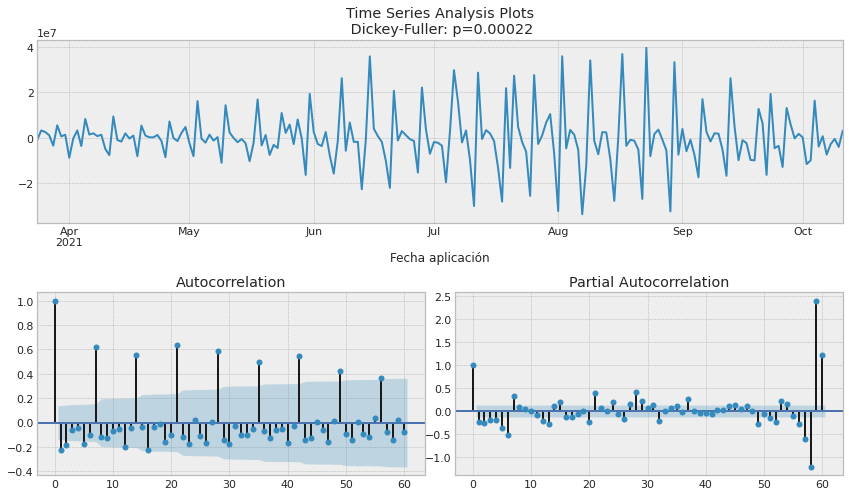

In [44]:
tsplot(df_ant2['Número de esquema completo aplicados'].diff[30+1:], lags=60)

La serie es diaria. Es decir, los datos del dataset responden a dosis aplicadas cada dia.

- $ p (Autorrelación Parcial) $ es probablemente 6 ya que es el último rezago significativo en el PACF, después del cual, la mayoría de los demás no son significativos.
- $ d $ es igual a 1 porque tuvimos las primeras diferencias
- $ q (Autorrelación) $ debería estar en algún lugar alrededor de 1, así como se ve en el ACF
- $ P (Autorrelación Parcial) $ podría ser 2, ya que los retrasos 30 y 60 son algo significativos en el PACF
- $ D $ nuevamente es igual a 1 porque realizamos una diferenciación estacional
- $ Q (Autorrelación) $ es probablemente 1. El desfase 30 en ACF es significativo, mientras que el 60 no lo es.

In [334]:
# Definir valores iniciales 
ps = range(2, 6)
d = 1 
qs = range(2, 6)
Ps = range(0, 2)
D = 1 
Qs = range(0, 2)
s = 7 # season length is still 30

# creando lista de posibles combinaciones 
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(parameters_list)
len(parameters_list)

[(2, 2, 0, 0), (2, 2, 0, 1), (2, 2, 1, 0), (2, 2, 1, 1), (2, 3, 0, 0), (2, 3, 0, 1), (2, 3, 1, 0), (2, 3, 1, 1), (2, 4, 0, 0), (2, 4, 0, 1), (2, 4, 1, 0), (2, 4, 1, 1), (2, 5, 0, 0), (2, 5, 0, 1), (2, 5, 1, 0), (2, 5, 1, 1), (3, 2, 0, 0), (3, 2, 0, 1), (3, 2, 1, 0), (3, 2, 1, 1), (3, 3, 0, 0), (3, 3, 0, 1), (3, 3, 1, 0), (3, 3, 1, 1), (3, 4, 0, 0), (3, 4, 0, 1), (3, 4, 1, 0), (3, 4, 1, 1), (3, 5, 0, 0), (3, 5, 0, 1), (3, 5, 1, 0), (3, 5, 1, 1), (4, 2, 0, 0), (4, 2, 0, 1), (4, 2, 1, 0), (4, 2, 1, 1), (4, 3, 0, 0), (4, 3, 0, 1), (4, 3, 1, 0), (4, 3, 1, 1), (4, 4, 0, 0), (4, 4, 0, 1), (4, 4, 1, 0), (4, 4, 1, 1), (4, 5, 0, 0), (4, 5, 0, 1), (4, 5, 1, 0), (4, 5, 1, 1), (5, 2, 0, 0), (5, 2, 0, 1), (5, 2, 1, 0), (5, 2, 1, 1), (5, 3, 0, 0), (5, 3, 0, 1), (5, 3, 1, 0), (5, 3, 1, 1), (5, 4, 0, 0), (5, 4, 0, 1), (5, 4, 1, 0), (5, 4, 1, 1), (5, 5, 0, 0), (5, 5, 0, 1), (5, 5, 1, 0), (5, 5, 1, 1)]


64

In [335]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # Tenemos que hacer un try-except porque algunas combinaciones fallan en converger
        try:
            model=sm.tsa.statespace.SARIMAX(df_ant2['Número de esquema completo aplicados'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # guardar el mejor modelo, AIC y parametros
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # Ordener de manera creciente, a menor valor de AIC es MEJOR
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [336]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/64 [00:00<?, ?it/s]

CPU times: user 3min 4s, sys: 2min 13s, total: 5min 17s
Wall time: 2min 42s


In [337]:
result_table.head()

,parameters,aic
0,"(4, 3, 1, 1)",7773.527144
1,"(4, 3, 0, 1)",7773.643388
2,"(5, 3, 1, 1)",7777.852076
3,"(3, 3, 1, 1)",7778.904029
4,"(2, 3, 0, 1)",7779.062113


In [338]:
# Ajustar los parametros para dejar el valor mas bajo de AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(df_ant2['Número de esquema completo aplicados'], order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                    Statespace Model Results                                    
Dep. Variable:     Número de esquema completo aplicados   No. Observations:                  233
Model:                    SARIMAX(4, 1, 3)x(1, 1, 1, 7)   Log Likelihood               -3876.764
Date:                                  Wed, 17 Nov 2021   AIC                           7773.527
Time:                                          07:47:04   BIC                           7807.688
Sample:                                               0   HQIC                          7787.315
                                                  - 233                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6848      0.126     -5.442      0.000      -0.931

# Haciendo predicciones

Estimando los valores futuros y verificando los valores residuales.

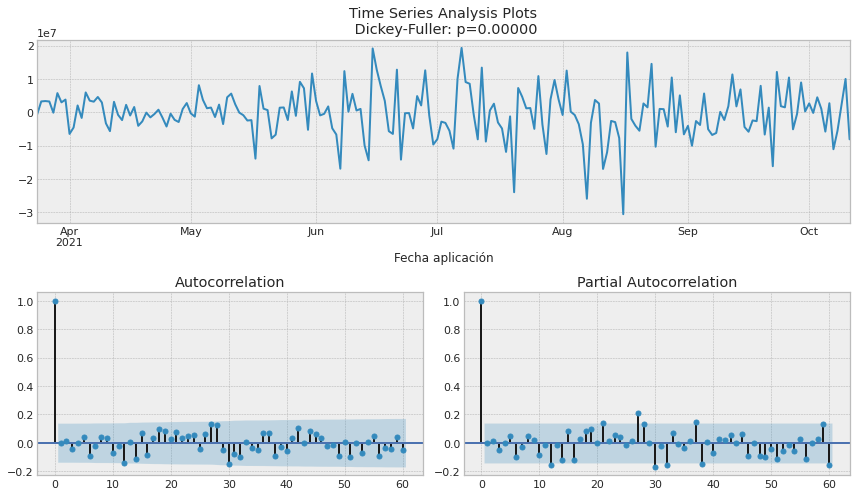

In [339]:
tsplot(best_model.resid[30+1:], lags=60)

Está claro que los residuos son estacionarios y no hay autocorrelaciones aparentes. Hagamos predicciones usando nuestro modelo.

In [340]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [343]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # Adicionar los valores del modelo
    data = series.copy()
    data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # hacer un cambio en los pasos s + d, porque estos valores no fueron observados por el modelo
     # debido a la diferenciación
    data['sarima_model'][:s+d] = np.NaN
    
    # pronosticando n_pasos adelante    
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calcular el error, nuevamente habiendo cambiado en los pasos s + d desde el principio
    error = mean_absolute_error(data['actual'][s+d:], data['sarima_model'][s+d:])
    
    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

ConversionError: ignored

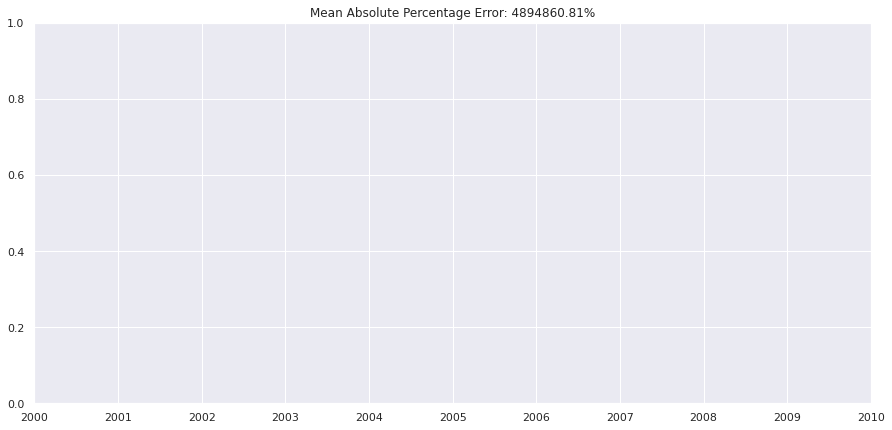

In [393]:
plotSARIMA(df_ant2, best_model, 60)
array

In [97]:
df_ant2.shape

(233, 1)

In [98]:
60/233

0.2575107296137339

In [323]:
best_model.fittedvalues

Fecha aplicación
2021-02-17             NaN
2021-02-19             NaN
2021-02-21             NaN
2021-02-24             NaN
2021-02-25             NaN
                  ...     
2021-10-07    1.953504e+07
2021-10-08    1.127265e+07
2021-10-09    3.101768e+06
2021-10-10   -8.784150e+06
2021-10-11    1.247458e+07
Length: 233, dtype: float64

In [91]:
df_ant2

,Número de esquema completo aplicados
Fecha aplicación,
2021-02-17,352195.0
2021-02-19,169965.0
2021-02-21,176270.0
2021-02-24,200913.0
2021-02-25,365458.0
...,...
2021-10-07,8450144.0
2021-10-08,5696824.0
2021-10-09,5213809.0


In [394]:
# Predicciones de los próximos 6 meses
forecast = best_model.predict(start = df_ant2.shape[0], end = df_ant2.shape[0]+180)
forecast.head(10)

233    1.294234e+07
234    9.147345e+06
235    1.061970e+07
236    9.871478e+06
237    4.222167e+06
238   -8.720085e+06
239    6.468367e+06
240    1.025303e+07
241    5.698553e+06
242    7.311414e+06
dtype: float64

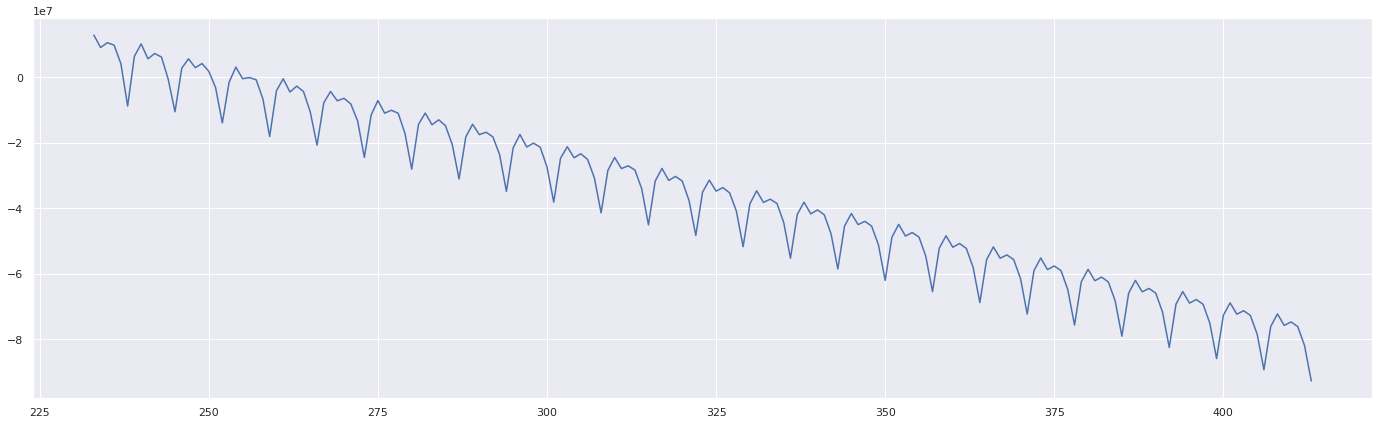

In [397]:
plt.figure(figsize=(24,7))
plt.plot(forecast)

# Conclusiones

Lamentablemente no pudo realizarse la conversión de formatos int a datetime en el dataset para realizar la gráfica de los datos. Sin embargo, se evidencian los datos predictivos.

El error es muy elevado.